In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import time
from xgboost import XGBClassifier

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

**Loading and Understanding the Dataset**

In [4]:
df_original = pd.read_csv("Drug_Consumption.csv")
df_quantified = pd.read_csv("Drug_Consumption_Quantified.csv")

print("Shape of original dataset: ", df_original.shape)
print("Shape of quantified dataset: ", df_quantified.shape)

Shape of original dataset:  (1884, 32)
Shape of quantified dataset:  (1884, 32)


In [5]:
df_original.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [6]:
df_quantified.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [7]:
df = df_quantified.drop('ID', axis = 1)
print("df.shape: ", df.shape)
df.head()

df.shape:  (1884, 31)


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


**Pre-Processing 1 : Check for missing values**

In [8]:
print(df.isnull().mean() * 100)

print("Number of rows with missing values: ", df.isnull().any(axis=1).sum())
print("Number of columns with missing values: ", df.isnull().any(axis=0).sum())

Age          0.0
Gender       0.0
Education    0.0
Country      0.0
Ethnicity    0.0
Nscore       0.0
Escore       0.0
Oscore       0.0
AScore       0.0
Cscore       0.0
Impulsive    0.0
SS           0.0
Alcohol      0.0
Amphet       0.0
Amyl         0.0
Benzos       0.0
Caff         0.0
Cannabis     0.0
Choc         0.0
Coke         0.0
Crack        0.0
Ecstasy      0.0
Heroin       0.0
Ketamine     0.0
Legalh       0.0
LSD          0.0
Meth         0.0
Mushrooms    0.0
Nicotine     0.0
Semer        0.0
VSA          0.0
dtype: float64
Number of rows with missing values:  0
Number of columns with missing values:  0


**We observe that there are no missing values in the dataset**

**Pre-Processing 2 : Visualzing the correlation matrix**

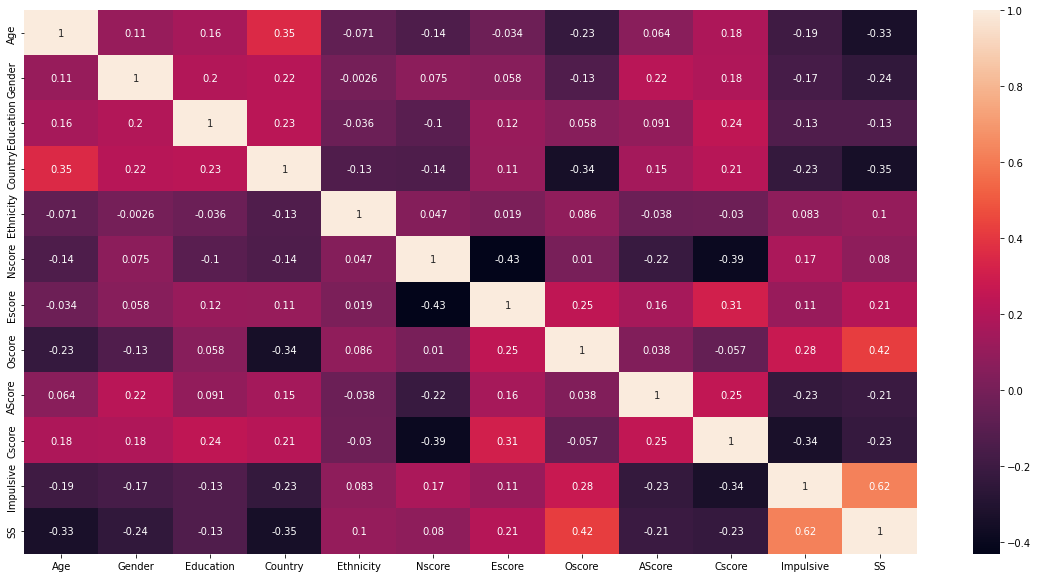

In [9]:
corr = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True)

We observe that none of the features are highly correlated with one another (no pair of features has correlation more than 0.90)

Pre-Processing 3 : Subset Datasets by Target
  * This a multi-class classification with 18 targets and 7 classes
  * We subset the dataset into 12 different subsets each having one target
  * For each subset, we do a multi-class classification over the 7 classes
  * 10 targets refer to 8 out of the 18 drugs we choose to model
      * df_alcohol
      * df_caff
      * df_cannabis
      * df_choc
      * df_coke
      * df_crack
      * df_ecstasy
      * df_nicotine
      * df_lsd
      * df_heroin
    
  * 7 classes refer to the following labels
      * "Never Used" ; Embedded as CLO in the dataset
      * "Used over a Decade" ; Embedded as CL1 in the dataset
      * "Used in Last Decade" ; Embedded as CL2 in the dataset
      * "Used in Last Year" ; Embedded as CL3 in the dataset
      * "Used in Lasr Month" ; Embedded as CL4 in the dataset
      * "Used in Last Week" ; Embedded as CL5 in the dataset
      * "Used in Last Day" ; Embedded as CL6 in the dataset


In [10]:
print("Following features are present in the dataset")

for col in df.columns:
  print(col)

Following features are present in the dataset
Age
Gender
Education
Country
Ethnicity
Nscore
Escore
Oscore
AScore
Cscore
Impulsive
SS
Alcohol
Amphet
Amyl
Benzos
Caff
Cannabis
Choc
Coke
Crack
Ecstasy
Heroin
Ketamine
Legalh
LSD
Meth
Mushrooms
Nicotine
Semer
VSA


In [11]:
drugs_to_ignore = ['Amphet', 'Amyl', 'Benzos', 'Ketamine', 'Legalh', 'Meth', 'VSA']
drugs_to_consider = ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']

Pre-Processing 3.1 : Creating subsets to perform prediction over only "drugs_to_consider" attributes

In [12]:
non_alcohol_feature = drugs_to_ignore + ['Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_caff_features = drugs_to_ignore + ['Alcohol', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_cannabis_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_choc_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_coke_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_crack_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_ecstasy_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_heroin_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'LSD', 'Mushrooms', 'Nicotine', 'Semer']
non_lsd_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Mushrooms', 'Nicotine', 'Semer']
non_mushrooms_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Nicotine', 'Semer']
non_nicotine_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Semer']

In [39]:
df_alcohol = df.drop(non_alcohol_feature, axis = 1)

df_caff = df.drop(non_caff_features, axis = 1)

df_cannabis = df.drop(non_cannabis_features, axis = 1)

df_choc = df.drop(non_choc_features, axis = 1)

df_coke = df.drop(non_coke_features, axis = 1)

df_crack = df.drop(non_crack_features, axis = 1)

df_ecstasy = df.drop(non_ecstasy_features, axis = 1)

df_lsd = df.drop(non_lsd_features, axis = 1)

df_heroin = df.drop(non_heroin_features, axis = 1)

df_nicotine = df.drop(non_nicotine_features, axis = 1)

df_mushroom = df.drop(non_mushrooms_features, axis = 1)

**Classification for Alcohol using SVM - Dual**

In [40]:
df_alcohol.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2


In [41]:
from sklearn.model_selection import train_test_split

X_alcohol = df_alcohol.drop('Alcohol', axis=1)
y_alcohol = df_alcohol['Alcohol']

X_alcohol_train, X_alcohol_test, y_alcohol_train, y_alcohol_test = train_test_split(X_alcohol, y_alcohol, test_size=0.2, random_state=42)

X_alcohol_dev, X_alcohol_val, y_alcohol_dev, y_alcohol_val = train_test_split(X_alcohol_train, y_alcohol_train, test_size=0.2, random_state=42)

print("X_alcohol_train, y_alcohol_train: ", X_alcohol_train.shape, y_alcohol_train.shape)
print("X_alcohol_dev, y_alcohol_dev: ", X_alcohol_dev.shape, y_alcohol_dev.shape)
print("X_alcohol_val, y_alcohol_val: ", X_alcohol_val.shape, y_alcohol_val.shape)
print("X_alcohol_test, y_alcohol_test: ", X_alcohol_test.shape, y_alcohol_test.shape)

X_alcohol_train, y_alcohol_train:  (1507, 12) (1507,)
X_alcohol_dev, y_alcohol_dev:  (1205, 12) (1205,)
X_alcohol_val, y_alcohol_val:  (302, 12) (302,)
X_alcohol_test, y_alcohol_test:  (377, 12) (377,)


In [42]:
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics

svm_classifier_dual_alcohol = SVC(kernel='linear')
svm_classifier_dual_alcohol.fit(X_alcohol_dev, y_alcohol_dev)

SVC(kernel='linear')

In [43]:
y_alcohol_dev_predict = svm_classifier_dual_alcohol.predict(X_alcohol_dev)
y_alcohol_val_predict = svm_classifier_dual_alcohol.predict(X_alcohol_val)
y_alcohol_test_predict = svm_classifier_dual_alcohol.predict(X_alcohol_test)

print("Accuracy on developemnt set: ", metrics.accuracy_score(y_alcohol_dev, y_alcohol_dev_predict))
print("Accuracy on validation set: ", metrics.accuracy_score(y_alcohol_val, y_alcohol_val_predict))
print("Accuracy on test set: ", metrics.accuracy_score(y_alcohol_test, y_alcohol_test_predict))

print("Test Confusion Matrix : ", metrics.confusion_matrix(y_alcohol_test, y_alcohol_test_predict))
print('Test Macro F1', metrics.f1_score(y_alcohol_test, y_alcohol_test_predict, average='macro'))
print('Test Micro F1', metrics.f1_score(y_alcohol_test, y_alcohol_test_predict, average='micro'))
print('Test Weighted F1', metrics.f1_score(y_alcohol_test, y_alcohol_test_predict, average='weighted'))

Accuracy on developemnt set:  0.3933609958506224
Accuracy on validation set:  0.4304635761589404
Accuracy on test set:  0.40848806366047746
Test Confusion Matrix :  [[  0   0   0   0   0   6   0]
 [  0   0   0   0   0   7   0]
 [  0   0   0   0   0  14   0]
 [  0   0   0   0   0  41   0]
 [  0   0   0   0   0  60   0]
 [  0   0   0   0   0 154   0]
 [  0   0   0   0   0  95   0]]
Test Macro F1 0.08286252354048963
Test Micro F1 0.40848806366047746
Test Weighted F1 0.23693846253752737


**Classification for Alcohol using Neural Network**

In [44]:
X_alcohol_dev_np = X_alcohol_dev.to_numpy()
y_alcohol_dev_np = y_alcohol_dev.to_numpy().reshape(y_alcohol_dev.shape[0], 1)

X_alcohol_val_np = X_alcohol_val.to_numpy()
y_alcohol_val_np = y_alcohol_val.to_numpy().reshape(y_alcohol_val.shape[0], 1)

X_alcohol_test_np = X_alcohol_test.to_numpy()
y_alcohol_test_np = y_alcohol_test.to_numpy().reshape(y_alcohol_test.shape[0], 1)

In [45]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y_alcohol_dev_ohe = ohe.fit_transform(y_alcohol_dev_np).toarray()
y_alcohol_val_ohe = ohe.fit_transform(y_alcohol_val_np).toarray()
y_alcohol_test_ohe = ohe.fit_transform(y_alcohol_test_np).toarray()

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_alcohol = Sequential()

model_alcohol.add(Dense(64, input_dim=12, activation='relu'))
model_alcohol.add(Dropout(0.2))
model_alcohol.add(BatchNormalization())

model_alcohol.add(Dense(32, activation='relu'))
model_alcohol.add(Dropout(0.2))
model_alcohol.add(BatchNormalization())

model_alcohol.add(Dense(7, activation='softmax')) 

In [47]:
model_alcohol.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_alcohol = model_alcohol.fit(X_alcohol_dev_np, y_alcohol_dev_ohe, epochs=50, verbose=0, batch_size=128, validation_data=(X_alcohol_val_np, y_alcohol_val_ohe))

[]

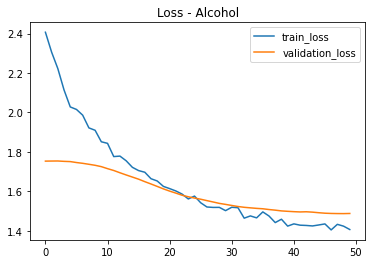

In [48]:
plt.plot(history_alcohol.history['loss'])
plt.plot(history_alcohol.history['val_loss'])
plt.title('Loss - Alcohol')
plt.legend(['train_loss', 'validation_loss'])
plt.plot()

[]

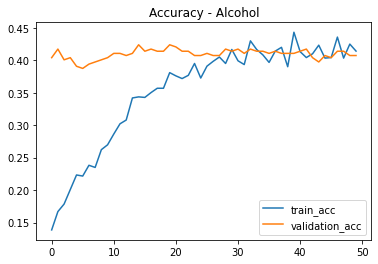

In [49]:
plt.plot(history_alcohol.history['accuracy'])
plt.plot(history_alcohol.history['val_accuracy'])
plt.title('Accuracy - Alcohol')
plt.legend(['train_acc', 'validation_acc'])
plt.plot()

In [50]:
score = model_alcohol.evaluate(X_alcohol_test_np, y_alcohol_test_ohe)
print("\n Accuracy for Alcohol is: ", score[1])

12/12 [==============================] - 0s 2ms/step - loss: 1.5420 - accuracy: 0.3899

 Accuracy for Alcohol is:  0.3899204134941101


----------------------------------------------------------------------------

**Classification for Caffeine using SVM - Dual**



In [18]:
df_caff.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Caff
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL6
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL5
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL6
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL6


In [28]:
X_caff = df_caff.drop('Caff', axis=1)
y_caff = df_caff['Caff']

X_caff_train, X_caff_test, y_caff_train, y_caff_test = train_test_split(X_caff, y_caff, test_size=0.2, random_state=42)

X_caff_dev, X_caff_val, y_caff_dev, y_caff_val = train_test_split(X_caff_train, y_caff_train, test_size=0.2, random_state=42)

print("X_caff_train, y_caff_train: ", X_caff_train.shape, y_caff_train.shape)
print("X_caff_dev, y_caff_dev: ", X_caff_dev.shape, y_caff_dev.shape)
print("X_caff_val, y_caff_val: ", X_caff_val.shape, y_caff_val.shape)
print("X_caff_test, y_caff_test: ", X_caff_test.shape, y_caff_test.shape)

X_caff_train, y_caff_train:  (1507, 12) (1507,)
X_caff_dev, y_caff_dev:  (1205, 12) (1205,)
X_caff_val, y_caff_val:  (302, 12) (302,)
X_caff_test, y_caff_test:  (377, 12) (377,)


In [29]:
svm_classifier_dual_caff = SVC(kernel='linear')
svm_classifier_dual_caff.fit(X_caff_dev, y_caff_dev)

SVC(kernel='linear')

In [30]:
y_caff_dev_predict = svm_classifier_dual_caff.predict(X_caff_dev)
y_caff_val_predict = svm_classifier_dual_caff.predict(X_caff_val)
y_caff_test_predict = svm_classifier_dual_caff.predict(X_caff_test)

print("Accuracy on developemnt set: ", metrics.accuracy_score(y_caff_dev, y_caff_dev_predict))
print("Accuracy on validation set: ", metrics.accuracy_score(y_caff_val, y_caff_val_predict))
print("Accuracy on test set: ", metrics.accuracy_score(y_caff_test, y_caff_test_predict))

print("Test Confusion Matrix : ", metrics.confusion_matrix(y_caff_test, y_caff_test_predict))
print('Test Macro F1', metrics.f1_score(y_caff_test, y_caff_test_predict, average='macro'))
print('Test Micro F1', metrics.f1_score(y_caff_test, y_caff_test_predict, average='micro'))
print('Test Weighted F1', metrics.f1_score(y_caff_test, y_caff_test_predict, average='weighted'))

Accuracy on developemnt set:  0.7319502074688796
Accuracy on validation set:  0.7516556291390728
Accuracy on test set:  0.7294429708222812
Test Confusion Matrix :  [[  0   0   0   0   0   0   6]
 [  0   0   0   0   0   0   3]
 [  0   0   0   0   0   0   6]
 [  0   0   0   0   0   0  13]
 [  0   0   0   0   0   0  24]
 [  0   0   0   0   0   0  50]
 [  0   0   0   0   0   0 275]]
Test Macro F1 0.12050832602979843
Test Micro F1 0.7294429708222812
Test Weighted F1 0.6153276594359733


**Classification for Caffeine using Neural Networks**

In [197]:
X_caff_dev_np = X_caff_dev.to_numpy()
y_caff_dev_np = y_caff_dev.to_numpy().reshape(y_caff_dev.shape[0], 1)

X_caff_val_np = X_caff_val.to_numpy()
y_caff_val_np = y_caff_val.to_numpy().reshape(y_caff_val.shape[0], 1)

X_caff_test_np = X_caff_test.to_numpy()
y_caff_test_np = y_caff_test.to_numpy().reshape(y_caff_test.shape[0], 1)

In [198]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y_caff_dev_ohe = ohe.fit_transform(y_caff_dev_np).toarray()
y_caff_val_ohe = ohe.fit_transform(y_caff_val_np).toarray()
y_caff_test_ohe = ohe.fit_transform(y_caff_test_np).toarray()

In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_caff = Sequential()

model_caff.add(Dense(64, input_dim=12, activation='relu'))
model_caff.add(Dropout(0.2))
model_caff.add(BatchNormalization())

model_caff.add(Dense(32, activation='relu'))
model_caff.add(Dropout(0.2))
model_caff.add(BatchNormalization())

model_caff.add(Dense(7, activation='softmax')) 

In [200]:
model_caff.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_caff = model_caff.fit(X_caff_dev_np, y_caff_dev_ohe, epochs=50, verbose=0, batch_size=128, validation_data=(X_caff_val_np, y_caff_val_ohe))

[]

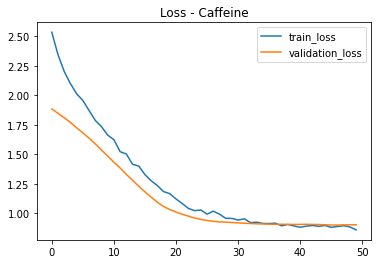

In [206]:
plt.plot(history_caff.history['loss'])
plt.plot(history_caff.history['val_loss'])
plt.title('Loss - Caffeine')
plt.legend(['train_loss', 'validation_loss'])
plt.plot()

[]

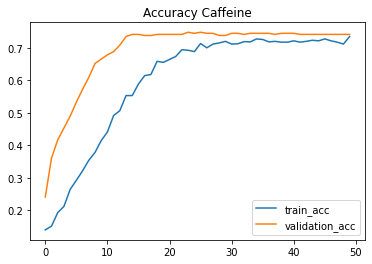

In [207]:
plt.plot(history_caff.history['accuracy'])
plt.plot(history_caff.history['val_accuracy'])
plt.title('Accuracy Caffeine')
plt.legend(['train_acc', 'validation_acc'])
plt.plot()

In [203]:
score = model_caff.evaluate(X_caff_test_np, y_caff_test_ohe)
print("\n Accuracy is: ", score[1])

12/12 [==============================] - 0s 7ms/step - loss: 0.9794 - accuracy: 0.7268

 Accuracy is:  0.7267904281616211


----------------------------------------------------------------------------

**Classification for Cannabis using SVM - Dual**

In [31]:
df_cannabis.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Cannabis
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL0


In [32]:
X_cannabis = df_cannabis.drop('Cannabis', axis=1)
y_cannabis = df_cannabis['Cannabis']

X_cannabis_train, X_cannabis_test, y_cannabis_train, y_cannabis_test = train_test_split(X_cannabis, y_cannabis, test_size=0.2, random_state=42)

X_cannabis_dev, X_cannabis_val, y_cannabis_dev, y_cannabis_val = train_test_split(X_cannabis_train, y_cannabis_train, test_size=0.2, random_state=42)

print("X_cannabis_train, y_cannabis_train: ", X_cannabis_train.shape, y_cannabis_train.shape)
print("X_cannabis_dev, y_cannabis_dev: ", X_cannabis_dev.shape, y_cannabis_dev.shape)
print("X_cannabis_val, y_cannabis_val: ", X_cannabis_val.shape, y_cannabis_val.shape)
print("X_cannabis_test, y_cannabis_test: ", X_cannabis_test.shape, y_cannabis_test.shape)

X_cannabis_train, y_cannabis_train:  (1507, 12) (1507,)
X_cannabis_dev, y_cannabis_dev:  (1205, 12) (1205,)
X_cannabis_val, y_cannabis_val:  (302, 12) (302,)
X_cannabis_test, y_cannabis_test:  (377, 12) (377,)


In [33]:
svm_classifier_dual_cannabis = SVC(kernel='linear')
svm_classifier_dual_cannabis.fit(X_cannabis_dev, y_cannabis_dev)

SVC(kernel='linear')

In [35]:
y_cannabis_dev_predict = svm_classifier_dual_cannabis.predict(X_cannabis_dev)
y_cannabis_val_predict = svm_classifier_dual_cannabis.predict(X_cannabis_val)
y_cannabis_test_predict = svm_classifier_dual_cannabis.predict(X_cannabis_test)

print("Accuracy on developemnt set: ", metrics.accuracy_score(y_cannabis_dev, y_cannabis_dev_predict))
print("Accuracy on validation set: ", metrics.accuracy_score(y_cannabis_val, y_cannabis_val_predict))
print("Accuracy on test set: ", metrics.accuracy_score(y_cannabis_test, y_cannabis_test_predict))

print("Test Confusion Matrix : ", metrics.confusion_matrix(y_cannabis_test, y_cannabis_test_predict))
print('Test Macro F1', metrics.f1_score(y_cannabis_test, y_cannabis_test_predict, average='macro'))
print('Test Micro F1', metrics.f1_score(y_cannabis_test, y_cannabis_test_predict, average='micro'))
print('Test Weighted F1', metrics.f1_score(y_cannabis_test, y_cannabis_test_predict, average='weighted'))

Accuracy on developemnt set:  0.4215767634854772
Accuracy on validation set:  0.40397350993377484
Accuracy on test set:  0.3978779840848806
Test Confusion Matrix :  [[75  0  2  0  0  1  6]
 [36  1  1  0  0  0  2]
 [41  0  2  1  0  0 23]
 [12  0  3  0  0  0 27]
 [ 5  0  2  0  0  0 17]
 [ 3  0  0  1  0  0 29]
 [11  0  2  2  0  0 72]]
Test Macro F1 0.1726770955880769
Test Micro F1 0.3978779840848806
Test Weighted F1 0.2657019013263514


**Classification for Cannabis Using Neural Networks**

In [208]:
X_cannabis_dev_np = X_cannabis_dev.to_numpy()
y_cannabis_dev_np = y_cannabis_dev.to_numpy().reshape(y_cannabis_dev.shape[0], 1)

X_cannabis_val_np = X_cannabis_val.to_numpy()
y_cannabis_val_np = y_cannabis_val.to_numpy().reshape(y_cannabis_val.shape[0], 1)

X_cannabis_test_np = X_cannabis_test.to_numpy()
y_cannabis_test_np = y_cannabis_test.to_numpy().reshape(y_cannabis_test.shape[0], 1)

In [209]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y_cannabis_dev_ohe = ohe.fit_transform(y_cannabis_dev_np).toarray()
y_cannabis_val_ohe = ohe.fit_transform(y_cannabis_val_np).toarray()
y_cannabis_test_ohe = ohe.fit_transform(y_cannabis_test_np).toarray()

In [210]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_cannabis = Sequential()

model_cannabis.add(Dense(64, input_dim=12, activation='relu'))
model_cannabis.add(Dropout(0.2))
model_cannabis.add(BatchNormalization())

model_cannabis.add(Dense(32, activation='relu'))
model_cannabis.add(Dropout(0.2))
model_cannabis.add(BatchNormalization())

model_cannabis.add(Dense(7, activation='softmax')) 

In [211]:
model_cannabis.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cannabis = model_cannabis.fit(X_cannabis_dev_np, y_cannabis_dev_ohe, epochs=50, verbose=0, batch_size=128, validation_data=(X_cannabis_val_np, y_cannabis_val_ohe))

[]

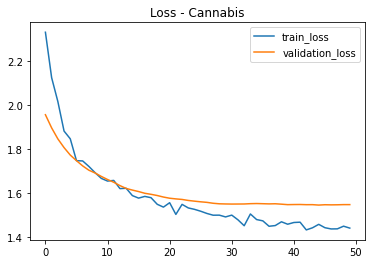

In [212]:
plt.plot(history_cannabis.history['loss'])
plt.plot(history_cannabis.history['val_loss'])
plt.title('Loss - Cannabis')
plt.legend(['train_loss', 'validation_loss'])
plt.plot()

[]

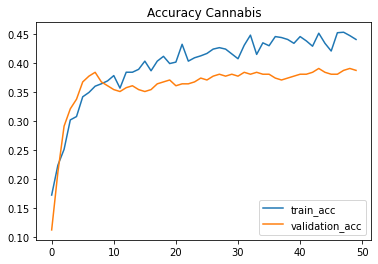

In [213]:
plt.plot(history_cannabis.history['accuracy'])
plt.plot(history_cannabis.history['val_accuracy'])
plt.title('Accuracy Cannabis')
plt.legend(['train_acc', 'validation_acc'])
plt.plot()

In [214]:
score = model_cannabis.evaluate(X_cannabis_test_np, y_cannabis_test_ohe)
print("\n Accuracy is: ", score[1])

12/12 [==============================] - 0s 2ms/step - loss: 1.5156 - accuracy: 0.4111

 Accuracy is:  0.4111405909061432


----------------------------------------------------------------------------

**Classification for Chocolate using SVM - Dual**

In [36]:
df_choc.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Choc
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL6
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL4
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL6
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL4


In [37]:
X_choc = df_choc.drop('Choc', axis=1)
y_choc = df_choc['Choc']

X_choc_train, X_choc_test, y_choc_train, y_choc_test = train_test_split(X_choc, y_choc, test_size=0.2, random_state=42)

X_choc_dev, X_choc_val, y_choc_dev, y_choc_val = train_test_split(X_choc_train, y_choc_train, test_size=0.2, random_state=42)

print("X_choc_train, y_choc_train: ", X_choc_train.shape, y_choc_train.shape)
print("X_choc_dev, y_choc_dev: ", X_choc_dev.shape, y_choc_dev.shape)
print("X_choc_val, y_choc_val: ", X_choc_val.shape, y_choc_val.shape)
print("X_choc_test, y_choc_test: ", X_choc_test.shape, y_choc_test.shape)

X_choc_train, y_choc_train:  (1507, 12) (1507,)
X_choc_dev, y_choc_dev:  (1205, 12) (1205,)
X_choc_val, y_choc_val:  (302, 12) (302,)
X_choc_test, y_choc_test:  (377, 12) (377,)


In [38]:
svm_classifier_dual_choc = SVC(kernel='linear')
svm_classifier_dual_choc.fit(X_choc_dev, y_choc_dev)

SVC(kernel='linear')

In [39]:
y_choc_dev_predict = svm_classifier_dual_choc.predict(X_choc_dev)
y_choc_val_predict = svm_classifier_dual_choc.predict(X_choc_val)
y_choc_test_predict = svm_classifier_dual_choc.predict(X_choc_test)

print("Accuracy on developemnt set: ", metrics.accuracy_score(y_choc_dev, y_choc_dev_predict))
print("Accuracy on validation set: ", metrics.accuracy_score(y_choc_val, y_choc_val_predict))
print("Accuracy on test set: ", metrics.accuracy_score(y_choc_test, y_choc_test_predict))

print("Test Confusion Matrix : ", metrics.confusion_matrix(y_choc_test, y_choc_test_predict))
print('Test Macro F1', metrics.f1_score(y_choc_test, y_choc_test_predict, average='macro'))
print('Test Micro F1', metrics.f1_score(y_choc_test, y_choc_test_predict, average='micro'))
print('Test Weighted F1', metrics.f1_score(y_choc_test, y_choc_test_predict, average='weighted'))

Accuracy on developemnt set:  0.45311203319502075
Accuracy on validation set:  0.38741721854304634
Accuracy on test set:  0.44562334217506633
Test Confusion Matrix :  [[  0   0   0   0   0   2   4]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0   1   2]
 [  0   0   0   0   0   5   3]
 [  0   0   0   0   0  21  30]
 [  0   0   0   0   0  40  95]
 [  0   0   0   0   0  45 128]]
Test Macro F1 0.12978653530377665
Test Micro F1 0.44562334217506633
Test Weighted F1 0.3846458733497972


**Classification for Chocolate using Neural Networks**

In [215]:
X_choc_dev_np = X_choc_dev.to_numpy()
y_choc_dev_np = y_choc_dev.to_numpy().reshape(y_choc_dev.shape[0], 1)

X_choc_val_np = X_choc_val.to_numpy()
y_choc_val_np = y_choc_val.to_numpy().reshape(y_choc_val.shape[0], 1)

X_choc_test_np = X_choc_test.to_numpy()
y_choc_test_np = y_choc_test.to_numpy().reshape(y_choc_test.shape[0], 1)

In [216]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y_choc_dev_ohe = ohe.fit_transform(y_choc_dev_np).toarray()
y_choc_val_ohe = ohe.fit_transform(y_choc_val_np).toarray()
y_choc_test_ohe = ohe.fit_transform(y_choc_test_np).toarray()

In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_choc = Sequential()

model_choc.add(Dense(64, input_dim=12, activation='relu'))
model_choc.add(Dropout(0.2))
model_choc.add(BatchNormalization())

model_choc.add(Dense(32, activation='relu'))
model_choc.add(Dropout(0.2))
model_choc.add(BatchNormalization())

model_choc.add(Dense(7, activation='softmax')) 

In [218]:
model_choc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_choc = model_choc.fit(X_choc_dev_np, y_choc_dev_ohe, epochs=50, verbose=0, batch_size=128, validation_data=(X_choc_val_np, y_choc_val_ohe))

[]

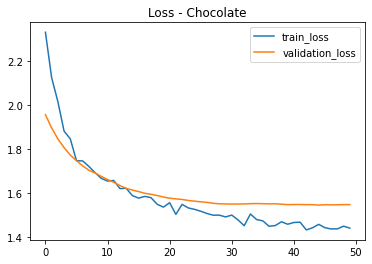

In [219]:
plt.plot(history_cannabis.history['loss'])
plt.plot(history_cannabis.history['val_loss'])
plt.title('Loss - Chocolate')
plt.legend(['train_loss', 'validation_loss'])
plt.plot()

[]

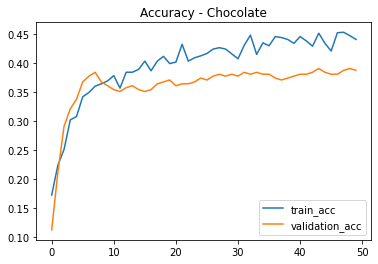

In [220]:
plt.plot(history_cannabis.history['accuracy'])
plt.plot(history_cannabis.history['val_accuracy'])
plt.title('Accuracy - Chocolate')
plt.legend(['train_acc', 'validation_acc'])
plt.plot()

In [221]:
score = model_choc.evaluate(X_choc_test_np, y_choc_test_ohe)
print("\n Accuracy is: ", score[1])

12/12 [==============================] - 0s 2ms/step - loss: 1.2378 - accuracy: 0.4430

 Accuracy is:  0.44297081232070923


----------------------------------------------------------------------------

**Classsification for Coke using SVM - Dual**

In [40]:
df_coke.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Coke
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL3
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL0


In [41]:
X_coke = df_coke.drop('Coke', axis=1)
y_coke = df_coke['Coke']

X_coke_train, X_coke_test, y_coke_train, y_coke_test = train_test_split(X_coke, y_coke, test_size=0.2, random_state=42)

X_coke_dev, X_coke_val, y_coke_dev, y_coke_val = train_test_split(X_coke_train, y_coke_train, test_size=0.2, random_state=42)

print("X_coke_train, y_coke_train: ", X_coke_train.shape, y_coke_train.shape)
print("X_coke_dev, y_coke_dev: ", X_coke_dev.shape, y_coke_dev.shape)
print("X_coke_val, y_coke_val: ", X_coke_val.shape, y_coke_val.shape)
print("X_coke_test, y_coke_test: ", X_coke_test.shape, y_coke_test.shape)

X_coke_train, y_coke_train:  (1507, 12) (1507,)
X_coke_dev, y_coke_dev:  (1205, 12) (1205,)
X_coke_val, y_coke_val:  (302, 12) (302,)
X_coke_test, y_coke_test:  (377, 12) (377,)


In [44]:
svm_classifier_dual_coke = SVC(kernel='linear')
svm_classifier_dual_coke.fit(X_coke_dev, y_coke_dev)

SVC(kernel='linear')

In [45]:
y_coke_dev_predict = svm_classifier_dual_coke.predict(X_coke_dev)
y_coke_val_predict = svm_classifier_dual_coke.predict(X_coke_val)
y_coke_test_predict = svm_classifier_dual_coke.predict(X_coke_test)

print("Accuracy on developemnt set: ", metrics.accuracy_score(y_coke_dev, y_coke_dev_predict))
print("Accuracy on validation set: ", metrics.accuracy_score(y_coke_val, y_coke_val_predict))
print("Accuracy on test set: ", metrics.accuracy_score(y_coke_test, y_coke_test_predict))

print("Test Confusion Matrix : ", metrics.confusion_matrix(y_coke_test, y_coke_test_predict))
print('Test Macro F1', metrics.f1_score(y_coke_test, y_coke_test_predict, average='macro'))
print('Test Micro F1', metrics.f1_score(y_coke_test, y_coke_test_predict, average='micro'))
print('Test Weighted F1', metrics.f1_score(y_coke_test, y_coke_test_predict, average='weighted'))

Accuracy on developemnt set:  0.5510373443983403
Accuracy on validation set:  0.5298013245033113
Accuracy on test set:  0.5649867374005305
Test Confusion Matrix :  [[213   0   0   0   0   0   0]
 [ 32   0   0   0   0   0   0]
 [ 50   0   0   0   0   0   0]
 [ 51   0   0   0   0   0   0]
 [ 24   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0]]
Test Macro F1 0.10314769975786924
Test Micro F1 0.5649867374005305
Test Weighted F1 0.40793957649597623


**Classification for Coke using Neural Netowrks**

In [222]:
X_coke_dev_np = X_coke_dev.to_numpy()
y_coke_dev_np = y_coke_dev.to_numpy().reshape(y_coke_dev.shape[0], 1)

X_coke_val_np = X_coke_val.to_numpy()
y_coke_val_np = y_coke_val.to_numpy().reshape(y_coke_val.shape[0], 1)

X_coke_test_np = X_coke_test.to_numpy()
y_coke_test_np = y_coke_test.to_numpy().reshape(y_coke_test.shape[0], 1)

In [223]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y_coke_dev_ohe = ohe.fit_transform(y_coke_dev_np).toarray()
y_coke_val_ohe = ohe.fit_transform(y_coke_val_np).toarray()
y_coke_test_ohe = ohe.fit_transform(y_coke_test_np).toarray()

In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_coke = Sequential()

model_coke.add(Dense(64, input_dim=12, activation='relu'))
model_coke.add(Dropout(0.2))
model_coke.add(BatchNormalization())

model_coke.add(Dense(32, activation='relu'))
model_coke.add(Dropout(0.2))
model_coke.add(BatchNormalization())

model_coke.add(Dense(7, activation='softmax')) 

In [225]:
model_coke.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_coke = model_coke.fit(X_coke_dev_np, y_coke_dev_ohe, epochs=50, verbose=0, batch_size=128, validation_data=(X_coke_val_np, y_coke_val_ohe))

[]

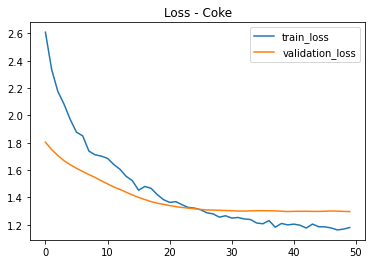

In [226]:
plt.plot(history_coke.history['loss'])
plt.plot(history_coke.history['val_loss'])
plt.title('Loss - Coke')
plt.legend(['train_loss', 'validation_loss'])
plt.plot()

[]

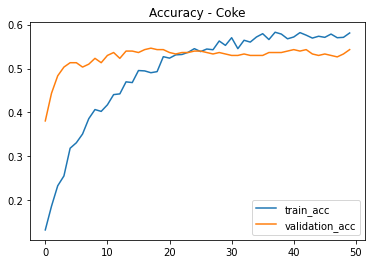

In [227]:
plt.plot(history_coke.history['accuracy'])
plt.plot(history_coke.history['val_accuracy'])
plt.title('Accuracy - Coke')
plt.legend(['train_acc', 'validation_acc'])
plt.plot()

In [228]:
score = model_coke.evaluate(X_coke_test_np, y_coke_test_ohe)
print("\n Accuracy is: ", score[1])

12/12 [==============================] - 0s 3ms/step - loss: 1.1116 - accuracy: 0.6048

 Accuracy is:  0.604774534702301


----------------------------------------------------------------------------

**Classification for Crack using SVM - Dual**

In [46]:
df_crack.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Crack
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL0


In [47]:
X_crack = df_crack.drop('Crack', axis=1)
y_crack = df_crack['Crack']

X_crack_train, X_crack_test, y_crack_train, y_crack_test = train_test_split(X_crack, y_crack, test_size=0.2, random_state=42)

X_crack_dev, X_crack_val, y_crack_dev, y_crack_val = train_test_split(X_crack_train, y_crack_train, test_size=0.2, random_state=42)

print("X_crack_train, y_crack_train: ", X_crack_train.shape, y_crack_train.shape)
print("X_crack_dev, y_crack_dev: ", X_crack_dev.shape, y_crack_dev.shape)
print("X_crack_val, y_crack_val: ", X_crack_val.shape, y_crack_val.shape)
print("X_crack_test, y_crack_test: ", X_crack_test.shape, y_crack_test.shape)

X_crack_train, y_crack_train:  (1507, 12) (1507,)
X_crack_dev, y_crack_dev:  (1205, 12) (1205,)
X_crack_val, y_crack_val:  (302, 12) (302,)
X_crack_test, y_crack_test:  (377, 12) (377,)


In [48]:
svm_classifier_dual_crack = SVC(kernel='linear')
svm_classifier_dual_crack.fit(X_crack_dev, y_crack_dev)

SVC(kernel='linear')

In [49]:
y_crack_dev_predict = svm_classifier_dual_crack.predict(X_crack_dev)
y_crack_val_predict = svm_classifier_dual_crack.predict(X_crack_val)
y_crack_test_predict = svm_classifier_dual_crack.predict(X_crack_test)

print("Accuracy on developemnt set: ", metrics.accuracy_score(y_crack_dev, y_crack_dev_predict))
print("Accuracy on validation set: ", metrics.accuracy_score(y_crack_val, y_crack_val_predict))
print("Accuracy on test set: ", metrics.accuracy_score(y_crack_test, y_crack_test_predict))

print("Test Confusion Matrix : ", metrics.confusion_matrix(y_crack_test, y_crack_test_predict))
print('Test Macro F1', metrics.f1_score(y_crack_test, y_crack_test_predict, average='macro'))
print('Test Micro F1', metrics.f1_score(y_crack_test, y_crack_test_predict, average='micro'))
print('Test Weighted F1', metrics.f1_score(y_crack_test, y_crack_test_predict, average='weighted'))

Accuracy on developemnt set:  0.8605809128630706
Accuracy on validation set:  0.8642384105960265
Accuracy on test set:  0.870026525198939
Test Confusion Matrix :  [[328   0   0   0   0   0]
 [ 14   0   0   0   0   0]
 [ 24   0   0   0   0   0]
 [  9   0   0   0   0   0]
 [  1   0   0   0   0   0]
 [  1   0   0   0   0   0]]
Test Macro F1 0.15508274231678487
Test Micro F1 0.870026525198939
Test Weighted F1 0.8095565964971688


**Classification for Crack using Neural Networks**

In [237]:
X_crack_dev_np = X_crack_dev.to_numpy()
y_crack_dev_np = y_crack_dev.to_numpy().reshape(y_crack_dev.shape[0], 1)

X_crack_val_np = X_crack_val.to_numpy()
y_crack_val_np = y_crack_val.to_numpy().reshape(y_crack_val.shape[0], 1)

X_crack_test_np = X_crack_test.to_numpy()
y_crack_test_np = y_crack_test.to_numpy().reshape(y_crack_test.shape[0], 1)

In [238]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y_crack_dev_ohe = ohe.fit_transform(y_crack_dev_np).toarray()
y_crack_val_ohe = ohe.fit_transform(y_crack_val_np).toarray()
y_crack_test_ohe = ohe.fit_transform(y_crack_test_np).toarray()

In [239]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_crack = Sequential()

model_crack.add(Dense(64, input_dim=12, activation='relu'))
model_crack.add(Dropout(0.2))
model_crack.add(BatchNormalization())

model_crack.add(Dense(32, activation='relu'))
model_crack.add(Dropout(0.2))
model_crack.add(BatchNormalization())

model_crack.add(Dense(7, activation='softmax')) 

In [240]:
model_crack.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_crack = model_crack.fit(X_crack_dev_np, y_crack_dev_ohe, epochs=50, verbose=0, batch_size=128, validation_data=(X_crack_val_np, y_crack_val_ohe))

[]

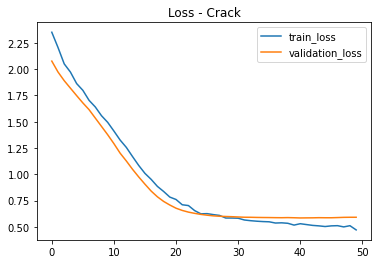

In [241]:
plt.plot(history_crack.history['loss'])
plt.plot(history_crack.history['val_loss'])
plt.title('Loss - Crack')
plt.legend(['train_loss', 'validation_loss'])
plt.plot()

[]

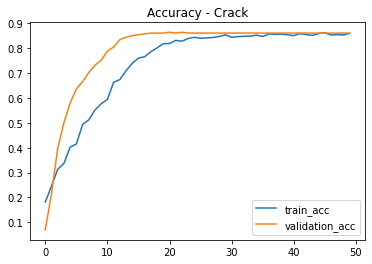

In [245]:
plt.plot(history_crack.history['accuracy'])
plt.plot(history_crack.history['val_accuracy'])
plt.title('Accuracy - Crack')
plt.legend(['train_acc', 'validation_acc'])
plt.plot()

----------------------------------------------------------------------------

**Classification for Ecstasy using SVM - Dual**

In [50]:
df_ecstasy.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Ecstasy
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL1
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL0


In [51]:
X_ecstasy = df_ecstasy.drop('Ecstasy', axis=1)
y_ecstasy = df_ecstasy['Ecstasy']

X_ecstasy_train, X_ecstasy_test, y_ecstasy_train, y_ecstasy_test = train_test_split(X_ecstasy, y_ecstasy, test_size=0.2, random_state=42)

X_ecstasy_dev, X_ecstasy_val, y_ecstasy_dev, y_ecstasy_val = train_test_split(X_ecstasy_train, y_ecstasy_train, test_size=0.2, random_state=42)

print("X_ecstasy_train, y_ecstasy_train: ", X_ecstasy_train.shape, y_ecstasy_train.shape)
print("X_ecstasy_dev, y_ecstasy_dev: ", X_ecstasy_dev.shape, y_ecstasy_dev.shape)
print("X_ecstasy_val, y_ecstasy_val: ", X_ecstasy_val.shape, y_ecstasy_val.shape)
print("X_ecstasy_test, y_ecstasy_test: ", X_ecstasy_test.shape, y_ecstasy_test.shape)

X_ecstasy_train, y_ecstasy_train:  (1507, 12) (1507,)
X_ecstasy_dev, y_ecstasy_dev:  (1205, 12) (1205,)
X_ecstasy_val, y_ecstasy_val:  (302, 12) (302,)
X_ecstasy_test, y_ecstasy_test:  (377, 12) (377,)


In [52]:
svm_classifier_dual_ecstasy = SVC(kernel='linear')
svm_classifier_dual_ecstasy.fit(X_ecstasy_dev, y_ecstasy_dev)

SVC(kernel='linear')

In [54]:
y_ecstasy_dev_predict = svm_classifier_dual_ecstasy.predict(X_ecstasy_dev)
y_ecstasy_val_predict = svm_classifier_dual_ecstasy.predict(X_ecstasy_val)
y_ecstasy_test_predict = svm_classifier_dual_ecstasy.predict(X_ecstasy_test)

print("Accuracy on developemnt set: ", metrics.accuracy_score(y_ecstasy_dev, y_ecstasy_dev_predict))
print("Accuracy on validation set: ", metrics.accuracy_score(y_ecstasy_val, y_ecstasy_val_predict))
print("Accuracy on test set: ", metrics.accuracy_score(y_ecstasy_test, y_ecstasy_test_predict))

print("Test Confusion Matrix : ", metrics.confusion_matrix(y_ecstasy_test, y_ecstasy_test_predict))
print('Test Macro F1', metrics.f1_score(y_ecstasy_test, y_ecstasy_test_predict, average='macro'))
print('Test Micro F1', metrics.f1_score(y_ecstasy_test, y_ecstasy_test_predict, average='micro'))
print('Test Weighted F1', metrics.f1_score(y_ecstasy_test, y_ecstasy_test_predict, average='weighted'))

Accuracy on developemnt set:  0.5510373443983403
Accuracy on validation set:  0.5331125827814569
Accuracy on test set:  0.5994694960212201
Test Confusion Matrix :  [[207   0   0  12   0   0   0]
 [ 29   0   0   0   0   0   0]
 [ 33   0   0   7   0   0   0]
 [ 32   0   0  19   0   0   0]
 [ 17   0   0   6   0   0   0]
 [ 12   0   0   2   0   0   0]
 [  1   0   0   0   0   0   0]]
Test Macro F1 0.1634971214352658
Test Micro F1 0.5994694960212201
Test Weighted F1 0.4902563771102698


**Classification for Ecstasy using Neural Networks**

In [246]:
X_ecstasy_dev_np = X_ecstasy_dev.to_numpy()
y_ecstasy_dev_np = y_ecstasy_dev.to_numpy().reshape(y_ecstasy_dev.shape[0], 1)

X_ecstasy_val_np = X_ecstasy_val.to_numpy()
y_ecstasy_val_np = y_ecstasy_val.to_numpy().reshape(y_ecstasy_val.shape[0], 1)

X_ecstasy_test_np = X_ecstasy_test.to_numpy()
y_ecstasy_test_np = y_ecstasy_test.to_numpy().reshape(y_ecstasy_test.shape[0], 1)

In [247]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y_ecstasy_dev_ohe = ohe.fit_transform(y_ecstasy_dev_np).toarray()
y_ecstasy_val_ohe = ohe.fit_transform(y_ecstasy_val_np).toarray()
y_ecstasy_test_ohe = ohe.fit_transform(y_ecstasy_test_np).toarray()

In [248]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_ecstasy = Sequential()

model_ecstasy.add(Dense(64, input_dim=12, activation='relu'))
model_ecstasy.add(Dropout(0.2))
model_ecstasy.add(BatchNormalization())

model_ecstasy.add(Dense(32, activation='relu'))
model_ecstasy.add(Dropout(0.2))
model_ecstasy.add(BatchNormalization())

model_ecstasy.add(Dense(7, activation='softmax')) 

In [249]:
model_ecstasy.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_ecstasy = model_ecstasy.fit(X_ecstasy_dev_np, y_ecstasy_dev_ohe, epochs=50, verbose=0, batch_size=128, validation_data=(X_ecstasy_val_np, y_ecstasy_val_ohe))

[]

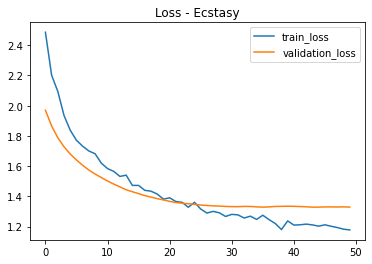

In [251]:
plt.plot(history_ecstasy.history['loss'])
plt.plot(history_ecstasy.history['val_loss'])
plt.title('Loss - Ecstasy')
plt.legend(['train_loss', 'validation_loss'])
plt.plot()

[]

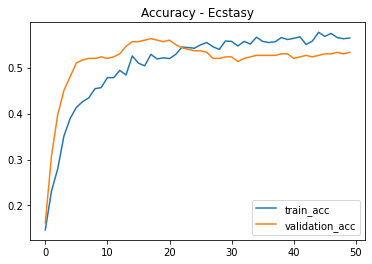

In [252]:
plt.plot(history_ecstasy.history['accuracy'])
plt.plot(history_ecstasy.history['val_accuracy'])
plt.title('Accuracy - Ecstasy')
plt.legend(['train_acc', 'validation_acc'])
plt.plot()

In [253]:
score = model_ecstasy.evaluate(X_ecstasy_test_np, y_ecstasy_test_ohe)
print("\n Accuracy is: ", score[1])

12/12 [==============================] - 0s 3ms/step - loss: 1.1668 - accuracy: 0.5995

 Accuracy is:  0.5994694828987122


----------------------------------------------------------------------------

**Classification for Heroin using SVM - Dual**

In [55]:
df_heroin.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Heroin
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL0


In [56]:
X_heroin = df_heroin.drop('Heroin', axis=1)
y_heroin = df_heroin['Heroin']

X_heroin_train, X_heroin_test, y_heroin_train, y_heroin_test = train_test_split(X_heroin, y_heroin, test_size=0.2, random_state=42)

X_heroin_dev, X_heroin_val, y_heroin_dev, y_heroin_val = train_test_split(X_heroin_train, y_heroin_train, test_size=0.2, random_state=42)

print("X_heroin_train, y_heroin_train: ", X_heroin_train.shape, y_heroin_train.shape)
print("X_heroin_dev, y_heroin_dev: ", X_heroin_dev.shape, y_heroin_dev.shape)
print("X_heroin_val, y_heroin_val: ", X_heroin_val.shape, y_heroin_val.shape)
print("X_heroin_test, y_heroin_test: ", X_heroin_test.shape, y_heroin_test.shape)

X_heroin_train, y_heroin_train:  (1507, 12) (1507,)
X_heroin_dev, y_heroin_dev:  (1205, 12) (1205,)
X_heroin_val, y_heroin_val:  (302, 12) (302,)
X_heroin_test, y_heroin_test:  (377, 12) (377,)


In [57]:
svm_classifier_dual_heroin = SVC(kernel='linear')
svm_classifier_dual_heroin.fit(X_heroin_dev, y_heroin_dev)

SVC(kernel='linear')

In [58]:
y_heroin_dev_predict = svm_classifier_dual_heroin.predict(X_heroin_dev)
y_heroin_val_predict = svm_classifier_dual_heroin.predict(X_heroin_val)
y_heroin_test_predict = svm_classifier_dual_heroin.predict(X_heroin_test)

print("Accuracy on developemnt set: ", metrics.accuracy_score(y_heroin_dev, y_heroin_dev_predict))
print("Accuracy on validation set: ", metrics.accuracy_score(y_heroin_val, y_heroin_val_predict))
print("Accuracy on test set: ", metrics.accuracy_score(y_heroin_test, y_heroin_test_predict))

print("Test Confusion Matrix : ", metrics.confusion_matrix(y_heroin_test, y_heroin_test_predict))
print('Test Macro F1', metrics.f1_score(y_heroin_test, y_heroin_test_predict, average='macro'))
print('Test Micro F1', metrics.f1_score(y_heroin_test, y_heroin_test_predict, average='micro'))
print('Test Weighted F1', metrics.f1_score(y_heroin_test, y_heroin_test_predict, average='weighted'))

Accuracy on developemnt set:  0.8547717842323651
Accuracy on validation set:  0.8377483443708609
Accuracy on test set:  0.8514588859416445
Test Confusion Matrix :  [[321   0   0   0   0   0   0]
 [ 17   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0]]
Test Macro F1 0.1313958248055669
Test Micro F1 0.8514588859416445
Test Weighted F1 0.7831469982443207


**Classification for Heroin using Neural Networks**

In [254]:
X_heroin_dev_np = X_heroin_dev.to_numpy()
y_heroin_dev_np = y_heroin_dev.to_numpy().reshape(y_heroin_dev.shape[0], 1)

X_heroin_val_np = X_heroin_val.to_numpy()
y_heroin_val_np = y_heroin_val.to_numpy().reshape(y_heroin_val.shape[0], 1)

X_heroin_test_np = X_heroin_test.to_numpy()
y_heroin_test_np = y_heroin_test.to_numpy().reshape(y_heroin_test.shape[0], 1)

In [255]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y_heroin_dev_ohe = ohe.fit_transform(y_heroin_dev_np).toarray()
y_heroin_val_ohe = ohe.fit_transform(y_heroin_val_np).toarray()
y_heroin_test_ohe = ohe.fit_transform(y_heroin_test_np).toarray()

In [256]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_heroin = Sequential()

model_heroin.add(Dense(64, input_dim=12, activation='relu'))
model_heroin.add(Dropout(0.2))
model_heroin.add(BatchNormalization())

model_heroin.add(Dense(32, activation='relu'))
model_heroin.add(Dropout(0.2))
model_heroin.add(BatchNormalization())

model_heroin.add(Dense(7, activation='softmax')) 

In [257]:
model_heroin.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_heroin = model_heroin.fit(X_heroin_dev_np, y_heroin_dev_ohe, epochs=50, verbose=0, batch_size=128, validation_data=(X_heroin_val_np, y_heroin_val_ohe))

[]

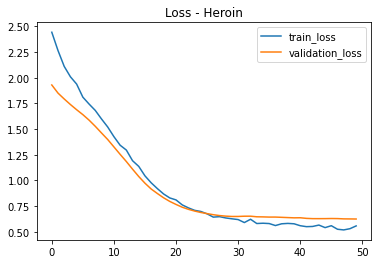

In [258]:
plt.plot(history_heroin.history['loss'])
plt.plot(history_heroin.history['val_loss'])
plt.title('Loss - Heroin')
plt.legend(['train_loss', 'validation_loss'])
plt.plot()

[]

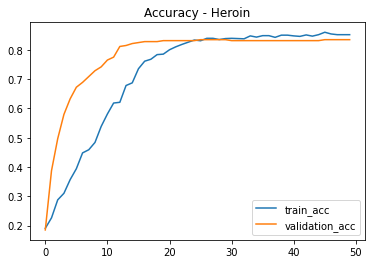

In [259]:
plt.plot(history_heroin.history['accuracy'])
plt.plot(history_heroin.history['val_accuracy'])
plt.title('Accuracy - Heroin')
plt.legend(['train_acc', 'validation_acc'])
plt.plot()

In [260]:
score = model_heroin.evaluate(X_heroin_test_np, y_heroin_test_ohe)
print("\n Accuracy is: ", score[1])

12/12 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.8541

 Accuracy is:  0.8541114330291748


**Classification for LSD using SVM - Dual**

In [52]:
df_lsd.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,LSD
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL2
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL0


In [53]:
X_lsd = df_lsd.drop('LSD', axis=1)
y_lsd = df_lsd['LSD']

X_lsd_train, X_lsd_test, y_lsd_train, y_lsd_test = train_test_split(X_lsd, y_lsd, test_size=0.2, random_state=42)

X_lsd_dev, X_lsd_val, y_lsd_dev, y_lsd_val = train_test_split(X_lsd_train, y_lsd_train, test_size=0.2, random_state=42)

print("X_lsd_train, y_lsd_train: ", X_lsd_train.shape, y_lsd_train.shape)
print("X_lsd_dev, y_lsd_dev: ", X_lsd_dev.shape, y_lsd_dev.shape)
print("X_lsd_val, y_lsd_val: ", X_lsd_val.shape, y_lsd_val.shape)
print("X_lsd_test, y_lsd_test: ", X_lsd_test.shape, y_lsd_test.shape)

X_lsd_train, y_lsd_train:  (1507, 12) (1507,)
X_lsd_dev, y_lsd_dev:  (1205, 12) (1205,)
X_lsd_val, y_lsd_val:  (302, 12) (302,)
X_lsd_test, y_lsd_test:  (377, 12) (377,)


In [54]:
svm_classifier_dual_lsd = SVC(kernel='linear')
svm_classifier_dual_lsd.fit(X_lsd_dev, y_lsd_dev)

SVC(kernel='linear')

In [55]:
y_lsd_dev_predict = svm_classifier_dual_lsd.predict(X_lsd_dev)
y_lsd_val_predict = svm_classifier_dual_lsd.predict(X_lsd_val)
y_lsd_test_predict = svm_classifier_dual_lsd.predict(X_lsd_test)

print("Accuracy on developemnt set: ", metrics.accuracy_score(y_lsd_dev, y_lsd_dev_predict))
print("Accuracy on validation set: ", metrics.accuracy_score(y_lsd_val, y_lsd_val_predict))
print("Accuracy on test set: ", metrics.accuracy_score(y_lsd_test, y_lsd_test_predict))

print("Test Confusion Matrix : ", metrics.confusion_matrix(y_lsd_test, y_lsd_test_predict))
print('Test Macro F1', metrics.f1_score(y_lsd_test, y_lsd_test_predict, average='macro'))
print('Test Micro F1', metrics.f1_score(y_lsd_test, y_lsd_test_predict, average='micro'))
print('Test Weighted F1', metrics.f1_score(y_lsd_test, y_lsd_test_predict, average='weighted'))

Accuracy on developemnt set:  0.6091286307053941
Accuracy on validation set:  0.5662251655629139
Accuracy on test set:  0.6047745358090185
Test Confusion Matrix :  [[198   4   0  24   0   0   0]
 [ 46  10   0   1   0   0   0]
 [ 26   1   0   1   0   0   0]
 [ 20   0   0  20   0   0   0]
 [  5   1   0  12   0   0   0]
 [  3   0   0   4   0   0   0]
 [  0   0   0   1   0   0   0]]
Test Macro F1 0.20257818687750392
Test Micro F1 0.6047745358090185
Test Weighted F1 0.5356613052213783


**Classification for LSD using Neural Networks**

In [56]:
X_lsd_dev_np = X_lsd_dev.to_numpy()
y_lsd_dev_np = y_lsd_dev.to_numpy().reshape(y_lsd_dev.shape[0], 1)

X_lsd_val_np = X_lsd_val.to_numpy()
y_lsd_val_np = y_lsd_val.to_numpy().reshape(y_lsd_val.shape[0], 1)

X_lsd_test_np = X_lsd_test.to_numpy()
y_lsd_test_np = y_lsd_test.to_numpy().reshape(y_lsd_test.shape[0], 1)

In [262]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y_lsd_dev_ohe = ohe.fit_transform(y_lsd_dev_np).toarray()
y_lsd_val_ohe = ohe.fit_transform(y_lsd_val_np).toarray()
y_lsd_test_ohe = ohe.fit_transform(y_lsd_test_np).toarray()

In [263]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_lsd = Sequential()

model_lsd.add(Dense(64, input_dim=12, activation='relu'))
model_lsd.add(Dropout(0.2))
model_lsd.add(BatchNormalization())

model_lsd.add(Dense(32, activation='relu'))
model_lsd.add(Dropout(0.2))
model_lsd.add(BatchNormalization())

model_lsd.add(Dense(7, activation='softmax')) 

In [264]:
model_lsd.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_lsd = model_lsd.fit(X_lsd_dev_np, y_lsd_dev_ohe, epochs=50, verbose=0, batch_size=128, validation_data=(X_lsd_val_np, y_lsd_val_ohe))

[]

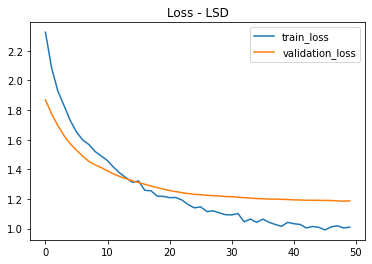

In [265]:
plt.plot(history_lsd.history['loss'])
plt.plot(history_lsd.history['val_loss'])
plt.title('Loss - LSD')
plt.legend(['train_loss', 'validation_loss'])
plt.plot()

[]

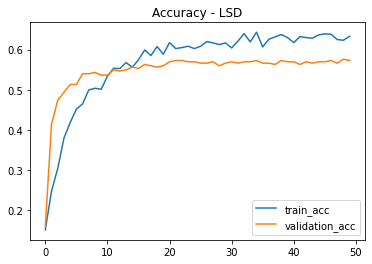

In [266]:
plt.plot(history_lsd.history['accuracy'])
plt.plot(history_lsd.history['val_accuracy'])
plt.title('Accuracy - LSD')
plt.legend(['train_acc', 'validation_acc'])
plt.plot()

In [267]:
score = model_lsd.evaluate(X_lsd_test_np, y_lsd_test_ohe)
print("\n Accuracy is: ", score[1])

12/12 [==============================] - 0s 4ms/step - loss: 1.0280 - accuracy: 0.6127

 Accuracy is:  0.6127321124076843


----------------------------------------------------------------------------

**Classification for Nictione using SVM - Dual**

In [341]:
df_nicotine.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Nicotine
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL2
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL6


In [342]:
X_nicotine = df_nicotine.drop('Nicotine', axis=1)
y_nicotine = df_nicotine['Nicotine']

X_nicotine_train, X_nicotine_test, y_nicotine_train, y_nicotine_test = train_test_split(X_nicotine, y_nicotine, test_size=0.2, random_state=42)

X_nicotine_dev, X_nicotine_val, y_nicotine_dev, y_nicotine_val = train_test_split(X_nicotine_train, y_nicotine_train, test_size=0.2, random_state=42)

print("X_nicotine_train, y_nicotine_train: ", X_nicotine_train.shape, y_nicotine_train.shape)
print("X_nicotine_dev, y_nicotine_dev: ", X_nicotine_dev.shape, y_nicotine_dev.shape)
print("X_nicotine_val, y_nicotine_val: ", X_nicotine_val.shape, y_nicotine_val.shape)
print("X_nicotine_test, y_nicotine_test: ", X_nicotine_test.shape, y_nicotine_test.shape)

X_nicotine_train, y_nicotine_train:  (1507, 12) (1507,)
X_nicotine_dev, y_nicotine_dev:  (1205, 12) (1205,)
X_nicotine_val, y_nicotine_val:  (302, 12) (302,)
X_nicotine_test, y_nicotine_test:  (377, 12) (377,)


In [343]:
svm_classifier_dual_nicotine = SVC(kernel='linear')
svm_classifier_dual_nicotine.fit(X_nicotine_dev, y_nicotine_dev)

SVC(kernel='linear')

In [344]:
y_nicotine_dev_predict = svm_classifier_dual_nicotine.predict(X_nicotine_dev)
y_nicotine_val_predict = svm_classifier_dual_nicotine.predict(X_nicotine_val)
y_nicotine_test_predict = svm_classifier_dual_nicotine.predict(X_nicotine_test)

print("Accuracy on developemnt set: ", metrics.accuracy_score(y_nicotine_dev, y_nicotine_dev_predict))
print("Accuracy on validation set: ", metrics.accuracy_score(y_nicotine_val, y_nicotine_val_predict))
print("Accuracy on test set: ", metrics.accuracy_score(y_nicotine_test, y_nicotine_test_predict))

print("Test Confusion Matrix : ", metrics.confusion_matrix(y_nicotine_test, y_nicotine_test_predict))
print('Test Macro F1', metrics.f1_score(y_nicotine_test, y_nicotine_test_predict, average='macro'))
print('Test Micro F1', metrics.f1_score(y_nicotine_test, y_nicotine_test_predict, average='micro'))
print('Test Weighted F1', metrics.f1_score(y_nicotine_test, y_nicotine_test_predict, average='weighted'))

Accuracy on developemnt set:  0.4190871369294606
Accuracy on validation set:  0.4271523178807947
Accuracy on test set:  0.35278514588859416
Test Confusion Matrix :  [[48  2  0  0  0  0 30]
 [27  5  0  0  0  0 18]
 [25  3  0  0  0  0 25]
 [ 9  0  0  0  0  0 25]
 [ 6  1  0  0  0  0 12]
 [ 5  0  0  0  0  0 25]
 [26  5  0  0  0  0 80]]
Test Macro F1 0.15244163694133833
Test Micro F1 0.35278514588859416
Test Weighted F1 0.25473895508773287


**Classification for Nicotine using Neural Networks**

In [345]:
X_nicotine_dev_np = X_nicotine_dev.to_numpy()
y_nicotine_dev_np = y_nicotine_dev.to_numpy().reshape(y_nicotine_dev.shape[0], 1)

X_nicotine_val_np = X_nicotine_val.to_numpy()
y_nicotine_val_np = y_nicotine_val.to_numpy().reshape(y_nicotine_val.shape[0], 1)

X_nicotine_test_np = X_nicotine_test.to_numpy()
y_nicotine_test_np = y_nicotine_test.to_numpy().reshape(y_nicotine_test.shape[0], 1)

In [346]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

y_nicotine_dev_ohe = ohe.fit_transform(y_nicotine_dev_np).toarray()
y_nicotine_val_ohe = ohe.fit_transform(y_nicotine_val_np).toarray()
y_nicotine_test_ohe = ohe.fit_transform(y_nicotine_test_np).toarray()

In [347]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

model_nicotine = Sequential()

model_nicotine.add(Dense(64, input_dim=12, activation='relu'))
model_nicotine.add(Dropout(0.2))
model_nicotine.add(BatchNormalization())

model_nicotine.add(Dense(32, activation='relu'))
model_nicotine.add(Dropout(0.2))
model_nicotine.add(BatchNormalization())

model_nicotine.add(Dense(7, activation='softmax')) 

In [348]:
model_nicotine.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_nicotine = model_nicotine.fit(X_nicotine_dev_np, y_nicotine_dev_ohe, epochs=50, verbose=0, batch_size=128, validation_data=(X_nicotine_val_np, y_nicotine_val_ohe))

[]

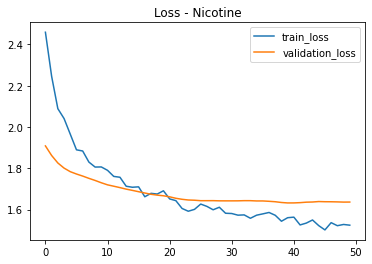

In [349]:
plt.plot(history_nicotine.history['loss'])
plt.plot(history_nicotine.history['val_loss'])
plt.title('Loss - Nicotine')
plt.legend(['train_loss', 'validation_loss'])
plt.plot()

[]

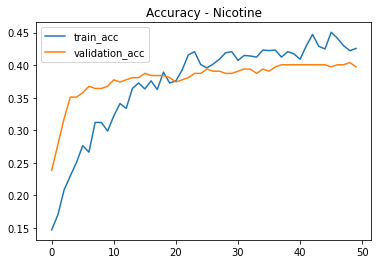

In [350]:
plt.plot(history_nicotine.history['accuracy'])
plt.plot(history_nicotine.history['val_accuracy'])
plt.title('Accuracy - Nicotine')
plt.legend(['train_acc', 'validation_acc'])
plt.plot()

In [351]:
score = model_nicotine.evaluate(X_nicotine_test_np, y_nicotine_test_ohe)
print("\n Accuracy is: ", score[1])

12/12 [==============================] - 0s 2ms/step - loss: 1.6970 - accuracy: 0.3528

 Accuracy is:  0.3527851402759552


----------------------------------------------------------------------------